In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
df = pd.read_csv('dataset_1.csv')
print(df.head())

# label_encoder = LabelEncoder()

# Fit and transform the categorical column
# encoded_column = label_encoder.fit_transform(df['Model'])
# print(encoded_column)
# df['Model'] = encoded_column
print(df.head())

   Unnamed: 0  speed  price    hp  mileage     Model
0           0   51.0   35.0  14.0      2.0  Series M
1           1   49.0   30.0  14.0      2.0  Series M
2           2   47.0   32.0  13.0      2.0  Series M
3           3   46.0   31.0  15.0      2.0  Series M
4           4   50.0   36.0  14.0      2.0  Series M
   Unnamed: 0  speed  price    hp  mileage     Model
0           0   51.0   35.0  14.0      2.0  Series M
1           1   49.0   30.0  14.0      2.0  Series M
2           2   47.0   32.0  13.0      2.0  Series M
3           3   46.0   31.0  15.0      2.0  Series M
4           4   50.0   36.0  14.0      2.0  Series M


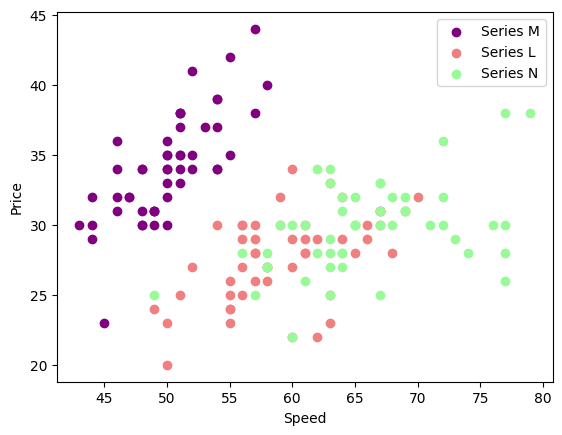

In [50]:
#SPEED V/s PRICE

class_M = df[df['Model'] == 'Series M']
class_L = df[df['Model'] == 'Series L']
class_N = df[df['Model'] == 'Series N']

plt.scatter(class_M['speed'], class_M['price'], color='purple', label='Series M')
plt.scatter(class_L['speed'], class_L['price'], color='#F08080', label='Series L')
plt.scatter(class_N['speed'], class_N['price'], color='#98FB98', label='Series N')

plt.xlabel("Speed")
plt.ylabel("Price")
plt.legend()
plt.show()


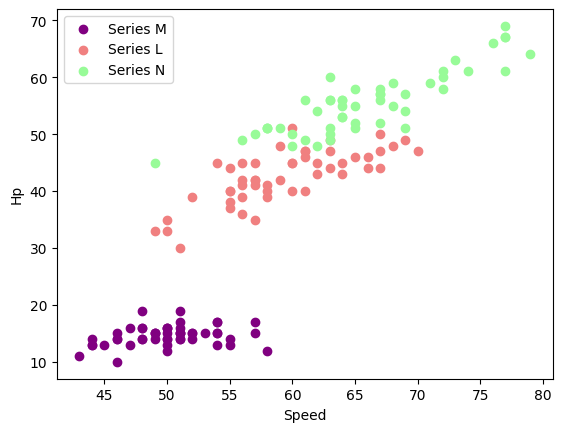

In [51]:
#SPEED V/s HP

plt.scatter(class_M['speed'], class_M['hp'], color='purple', label='Series M')
plt.scatter(class_L['speed'], class_L['hp'], color='#F08080', label='Series L')
plt.scatter(class_N['speed'], class_N['hp'], color='#98FB98', label='Series N')

plt.xlabel("Speed")
plt.ylabel("Hp")
plt.legend()
plt.show()

In [52]:
data = pd.read_csv("dataset_1.csv")
# data['Model'] = np.where(data['Model'] == 'Series L',1,0)
# Define features and target
X = data[['speed', 'price']].values
y = data['Model'].values

# print(data.head(52))
# # print(X)
# print(y.head(51))

In [53]:
import numpy as np
from sklearn.metrics import accuracy_score


class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        # y_mapped = np.where(y == 1, 1, 0)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.mean(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(z) >= 0.5, 1, 0)



Series M Train Accuracy: 0.9904761904761905
Series M Test Accuracy: 1.0
Series L Train Accuracy: 0.638095238095238
Series L Test Accuracy: 0.6888888888888889
Series N Train Accuracy: 0.638095238095238
Series N Test Accuracy: 0.7111111111111111


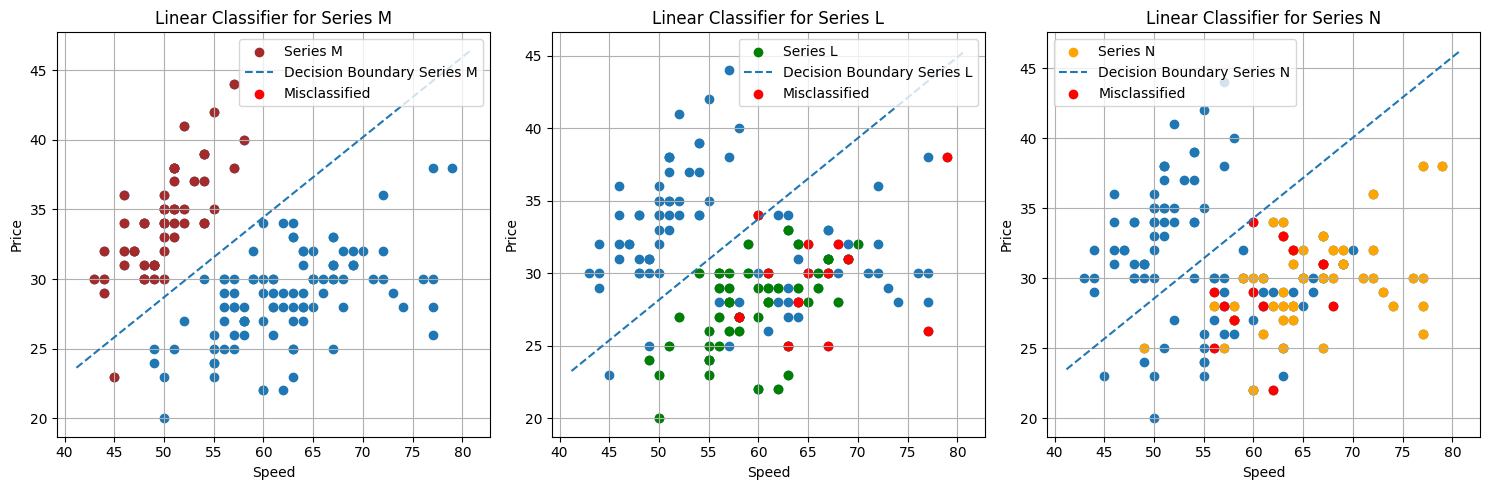

Mean Train Accuracy is:  0.7555555555555555
Mean Test Accuracy is:  0.7999999999999999


In [54]:
mean_train_acc = 0
mean_test_acc = 0
classifiers = {}
classes = ['Series M', 'Series L', 'Series N']
colors = ['brown', 'green', 'orange']  # Colors for each class

plt.figure(figsize=(15, 5))
for i,c in enumerate(classes,1):
    # Map class labels to 1 for the current class and 0 for others
    y_train_binary = np.where(data['Model'] == c, 1, 0)

    # Initialize and train the model
    X_train, X_test, y_train, y_test = train_test_split(X, y_train_binary, test_size=0.3, random_state=42)

    model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_train, y_train)
    classifiers[c] = model

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_pred_train)
    mean_train_acc += accuracy
    print(f"{c} Train Accuracy:", accuracy)

    accuracy = accuracy_score(y_test, y_pred_test)
    mean_test_acc += accuracy
    print(f"{c} Test Accuracy:", accuracy)

    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(X[data['Model'] == c][:, 0], X[data['Model'] == c][:, 1], label=c, color=colors[i-1])

    # Plot decision boundary
    coef = model.weights
    intercept = model.bias
    slope = -coef[0] / coef[1]
    intercept = -intercept / coef[1]
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--', label='Decision Boundary ' + c)

    # Mark misclassified points on test data points
    misclassified_points = X_test[y_test != y_pred_test]
    plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='red', label='Misclassified')

    plt.title(f'Linear Classifier for {c}')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

print("Mean Train Accuracy is: ",mean_train_acc/3)
print("Mean Test Accuracy is: ",mean_test_acc/3)

Series M Test Accuracy: 1.0
Series L Test Accuracy: 0.6888888888888889
Series N Test Accuracy: 0.7111111111111111


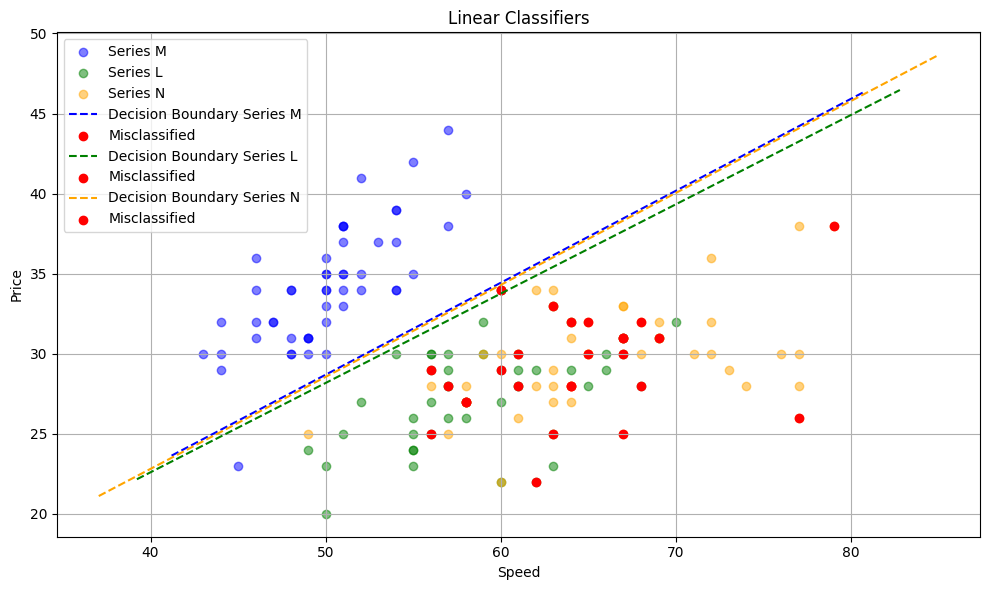

In [55]:
classifiers = {}
classes = ['Series M', 'Series L', 'Series N']
colors = ['blue', 'green', 'orange']  # Colors for each class
plt.figure(figsize=(10, 6))

# Plot all data points
for c in classes:
    plt.scatter(X[data['Model'] == c][:, 0], X[data['Model'] == c][:, 1], label=c, color=colors[classes.index(c)], alpha=0.5)

for i, c in enumerate(classes, 1):
    # Map class labels to 1 for the current class and 0 for others
    y_train_binary = np.where(data['Model'] == c, 1, 0)
    
    # Initialize and train the model
    X_train, X_test, y_train, y_test = train_test_split(X, y_train_binary, test_size=0.3, random_state=42)

    model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_train, y_train)
    classifiers[c] = model

    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{c} Test Accuracy:", accuracy)

    # Plot decision boundary
    coef = model.weights
    intercept = model.bias
    slope = -coef[0] / coef[1]
    intercept = -intercept / coef[1]
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--', label='Decision Boundary ' + c, color=colors[i-1])

    # Mark misclassified points
    misclassified_points = X_test[y_test != y_pred]
    plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='red', label='Misclassified')

plt.title('Linear Classifiers')
plt.xlabel('Speed')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Elastic Net logistic Regression

In [56]:
import numpy as np
from sklearn.metrics import accuracy_score


class ElasticNetLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000,alpha=0,l1_ratio=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):

        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / len(y)
            dw = dw + self.l1_ratio*(1-self.alpha)*self.weights
            dw = dw + self.l1_ratio*self.alpha*np.sign(self.weights)

            db = np.mean(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(z) >= 0.5, 1, 0)



In [57]:
train_accuracies = []
test_accuracies = []

# Define parameters
learning_rate = 0.01
num_iterations = 1000
alpha = 0
l1_ratio = 0.5
test_size = 0.2
num_runs = 10

# Perform 10 independent runs
for _ in range(num_runs):
    # Split data into train and test sets
    train_accuracie = 0
    test_accuracie = 0

    for c in classes:
        y_train_binary = np.where(data['Model'] == c, 1, 0)

        X_train, X_test, y_train, y_test = train_test_split(X, y_train_binary, test_size=test_size, random_state=42)
        
        # Initialize and train ElasticNetLogisticRegression model
        model = ElasticNetLogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations, alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        
        # Calculate training accuracy
        train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracie += train_accuracy
        
        # Calculate testing accuracy
        test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_accuracie += test_accuracy

    train_accuracies.append(train_accuracie/3)
    test_accuracies.append(test_accuracie/3)

# Report training and testing accuracies
# print("Training Accuracies:", train_accuracies)
# print("Testing Accuracies:", test_accuracies)
print("Average Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy:", np.mean(test_accuracies))

Average Training Accuracy: 0.6833333333333333
Average Testing Accuracy: 0.6111111111111109


For different learning rate values and ploting the graph for it


Training Time Best Accuracy:  0.8083333333333332
Best Learning Rate or beta at Training Time:  0.001
Testing Time Best Accuracy:  0.8555555555555556
Best Learning Rate or beta at Testing Time:  0.1


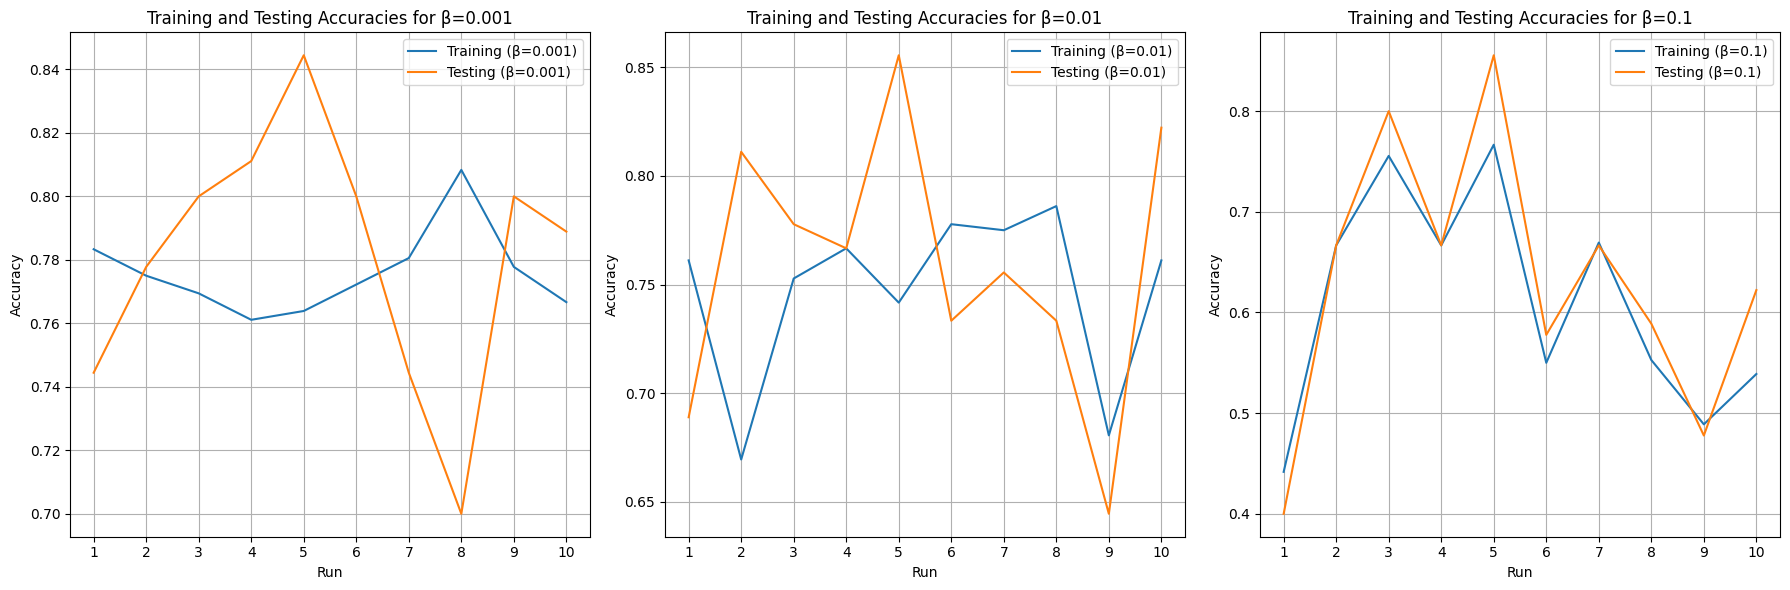

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class ElasticNetLogisticRegression:
    def __init__(self, learning_rate, num_iterations=1000, alpha=0, l1_ratio=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            dw = np.dot(X.T, (y_pred - y)) / len(y)
            dw = dw + self.l1_ratio * (1 - self.alpha) * self.weights
            dw = dw + self.l1_ratio * self.alpha * np.sign(self.weights)

            db = np.mean(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(z) >= 0.5, 1, 0)

# Data preparation
# Assuming X and y are defined

# Define parameters
num_iterations = 1000
alpha = 0
l1_ratio = 0.5
test_size = 0.2
num_runs = 10

# Define a range of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

train_accuracies = np.zeros((len(learning_rates), num_runs))
test_accuracies = np.zeros((len(learning_rates), num_runs))

# Perform experiments for each learning rate
for i, learning_rate in enumerate(learning_rates):
    for run in range(num_runs):
        # Split data into train and test sets
        train_accuracie = 0
        test_accuracie = 0

        for c in classes:

            y_binary = np.where(data['Model'] == c,1,0)
            X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=test_size, random_state=run)

            # Initialize and train ElasticNetLogisticRegression model
            model = ElasticNetLogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations, alpha=alpha, l1_ratio=l1_ratio)
            model.fit(X_train, y_train)

            # Calculate training accuracy
            train_pred = model.predict(X_train)
            train_accuracy = accuracy_score(y_train, train_pred)
            train_accuracie += train_accuracy
            

            # Calculate testing accuracy
            test_pred = model.predict(X_test)
            test_accuracy = accuracy_score(y_test, test_pred)
            test_accuracie += test_accuracy

        train_accuracies[i, run] = (train_accuracie)/3
        test_accuracies[i, run] = (test_accuracie)/3


max_index_row = np.argmax(train_accuracies, axis=1)
best_learning_rate_training_time = 0
best_training_accuracy = 0

for index,val in enumerate(max_index_row):
    if train_accuracies[index,val] > best_training_accuracy:
        
        best_training_accuracy = train_accuracies[index,val]
        best_learning_rate_training_time = learning_rates[index]

print("Training Time Best Accuracy: ",best_training_accuracy)
print("Best Learning Rate or beta at Training Time: ",best_learning_rate_training_time)


max_index_row = np.argmax(test_accuracies, axis=1)
best_learning_rate_testing_time = 0
best_testing_accuracy = 0

for index,val in enumerate(max_index_row):
    if test_accuracies[index,val] > best_testing_accuracy:
        
        best_testing_accuracy = test_accuracies[index,val]
        best_learning_rate_testing_time = learning_rates[index]

print("Testing Time Best Accuracy: ",best_testing_accuracy)
print("Best Learning Rate or beta at Testing Time: ",best_learning_rate_testing_time)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

for i, learning_rate in enumerate(learning_rates):
    axes[i].plot(range(1, num_runs + 1), train_accuracies[i], label=f'Training (β={learning_rate})')
    axes[i].plot(range(1, num_runs + 1), test_accuracies[i], label=f'Testing (β={learning_rate})')

    axes[i].set_title(f'Training and Testing Accuracies for β={learning_rate}')
    axes[i].set_xlabel('Run')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_xticks(range(1, num_runs + 1))
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Plotting Best Regressor

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class ElasticNetLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, alpha=0, l1_ratio=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            dw = np.dot(X.T, (y_pred - y)) / len(y)
            dw = dw + self.l1_ratio * (1 - self.alpha) * self.weights
            dw = dw + self.l1_ratio * self.alpha * np.sign(self.weights)

            db = np.mean(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(z) >= 0.5, 1, 0)


# Define parameters
num_iterations = 1000
alpha = 0
l1_ratio = 0.5
test_size = 0.2
num_runs = 10
learning_rate = 0.01

best_accuracy = 0
best_regressor = None
model_matrix = np.zeros((num_runs,len(classes)),dtype=object)
# Perform experiments for the best regressor
for run in range(num_runs):
    
    test_accuracie = 0
    for i,c in enumerate(classes):
        y_binary = np.where(data['Model'] == c,1,0)
  
        X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=test_size, random_state=run)

        # Initialize and train ElasticNetLogisticRegression model
        model = ElasticNetLogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations, alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        model_matrix[run,i] = model
        # print(model.weights)
        # Calculate testing accuracy
        test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_accuracie += test_accuracy

        # Check if current model is the best
    if test_accuracie > best_accuracy:
        best_accuracy = test_accuracie
        best_regressor = model_matrix[run,:]

    # Plot the decision boundary

print(best_accuracy/3)
print(best_regressor)


0.8555555555555555


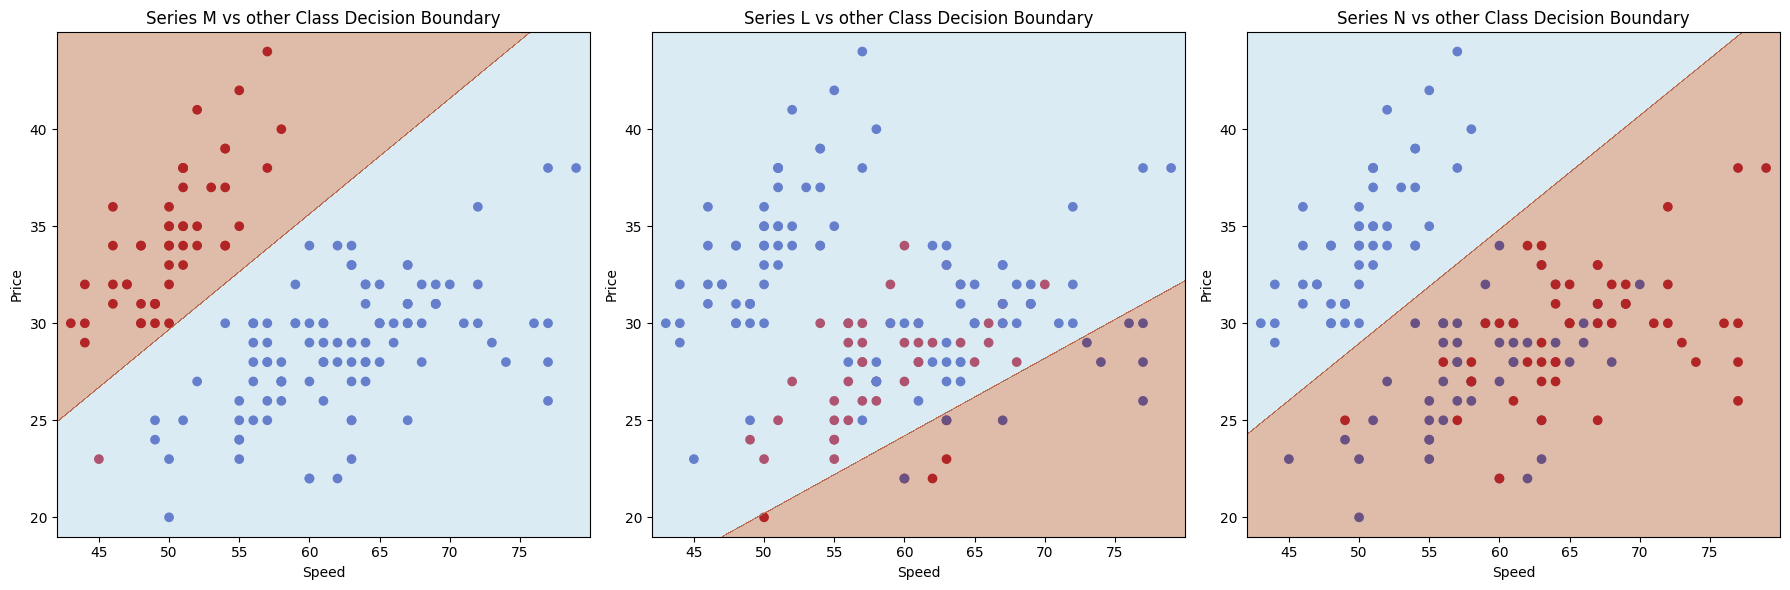

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Loop through each subplot
for i, ax in enumerate(axes):

    y_binary = np.where(data['Model'] == classes[i],1,0)
    ax.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.coolwarm)
    ax.set_xlabel('Speed')
    ax.set_ylabel('Price')
    titles = ['Series M vs other Class Decision Boundary', 'Series L vs other Class Decision Boundary', 'Series N vs other Class Decision Boundary']
    ax.set_title(titles[i])

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = best_regressor[i].predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Paired)

plt.tight_layout()
plt.show()


User Defined alpha values (Optional Question)

Training Time Best Accuracy:  0.8083333333333332
Best Alpha at Training Time:  0.0001
Testing Time Best Accuracy:  0.8777777777777778
Best Alpha at Testing Time:  0.5


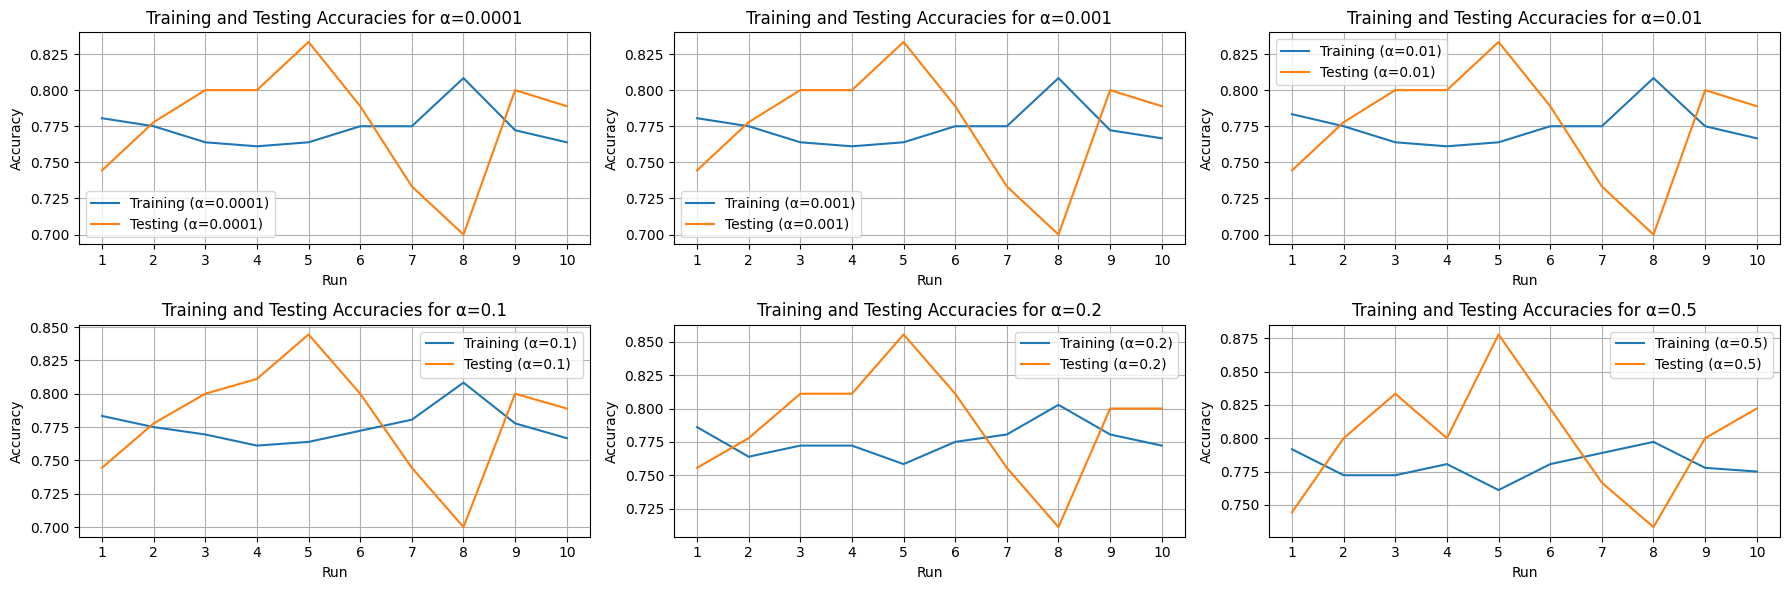

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class ElasticNetLogisticRegression:
    def __init__(self,  alpha,l1_ratio, learning_rate=0.001, num_iterations=1000, ):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            dw = np.dot(X.T, (y_pred - y)) / len(y)
            dw = dw + self.l1_ratio * (1 - self.alpha) * self.weights
            dw = dw + self.l1_ratio * self.alpha * np.sign(self.weights)

            db = np.mean(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(z) >= 0.5, 1, 0)


num_iterations = 1000
alphas = [0.0001,0.001,0.01,0.1,0.2,0.5]
l1_ratio = 0.3
test_size = 0.2
num_runs = 10

#Best Learning Rate
learning_rate = 0.001

train_accuracies = np.zeros((len(alphas), num_runs))
test_accuracies = np.zeros((len(alphas), num_runs))

# Perform experiments for each learning rate
for i, alpha in enumerate(alphas):
    for run in range(num_runs):
        # Split data into train and test sets
        train_accuracie = 0
        test_accuracie = 0

        for c in classes:

            y_binary = np.where(data['Model'] == c,1,0)
            X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=test_size, random_state=run)

            # Initialize and train ElasticNetLogisticRegression model
            model = ElasticNetLogisticRegression(alpha=alpha, learning_rate=learning_rate, num_iterations=num_iterations, l1_ratio=l1_ratio)
            model.fit(X_train, y_train)

            # Calculate training accuracy
            train_pred = model.predict(X_train)
            train_accuracy = accuracy_score(y_train, train_pred)
            train_accuracie += train_accuracy
            

            # Calculate testing accuracy
            test_pred = model.predict(X_test)
            test_accuracy = accuracy_score(y_test, test_pred)
            test_accuracie += test_accuracy

        train_accuracies[i, run] = (train_accuracie)/3
        test_accuracies[i, run] = (test_accuracie)/3


max_index_row = np.argmax(train_accuracies, axis=1)
best_alpha_training_time = 0
best_training_accuracy = 0

for index,val in enumerate(max_index_row):
    if train_accuracies[index,val] > best_training_accuracy:
        
        best_training_accuracy = train_accuracies[index,val]
        best_alpha_training_time = alphas[index]

print("Training Time Best Accuracy: ",best_training_accuracy)
print("Best Alpha at Training Time: ",best_alpha_training_time)


max_index_row = np.argmax(test_accuracies, axis=1)
best_alpha_testing_time = 0
best_testing_accuracy = 0

for index,val in enumerate(max_index_row):
    if test_accuracies[index,val] > best_testing_accuracy:
        
        best_testing_accuracy = test_accuracies[index,val]
        best_alpha_testing_time = alphas[index]

print("Testing Time Best Accuracy: ",best_testing_accuracy)
print("Best Alpha at Testing Time: ",best_alpha_testing_time)


fig, axes = plt.subplots(2, 3, figsize=(18, 6))  # 2 rows, 3 columns

for i in range(2):  # Iterate over rows
    for j in range(3):  # Iterate over columns
        idx = i * 3 + j  # Calculate the index for alpha value
        if idx < len(alphas):  # Check if the index is within the range of alphas
            alpha = alphas[idx]
            axes[i, j].plot(range(1, num_runs + 1), train_accuracies[idx], label=f'Training (α={alpha})')
            axes[i, j].plot(range(1, num_runs + 1), test_accuracies[idx], label=f'Testing (α={alpha})')

            axes[i, j].set_title(f'Training and Testing Accuracies for α={alpha}')
            axes[i, j].set_xlabel('Run')
            axes[i, j].set_ylabel('Accuracy')
            axes[i, j].set_xticks(range(1, num_runs + 1))
            axes[i, j].legend()
            axes[i, j].grid(True)
        else:  # If idx is out of range, hide the subplot
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


Implementing Vanilla Logistic Regression

In [89]:
import numpy as np
from sklearn.metrics import accuracy_score


class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        # y_mapped = np.where(y == 1, 1, 0)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.mean(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(z) >= 0.5, 1, 0)



Series M Train Accuracy: 0.9904761904761905
Series M Test Accuracy: 1.0
Series L Train Accuracy: 0.638095238095238
Series L Test Accuracy: 0.6888888888888889
Series N Train Accuracy: 0.638095238095238
Series N Test Accuracy: 0.7111111111111111


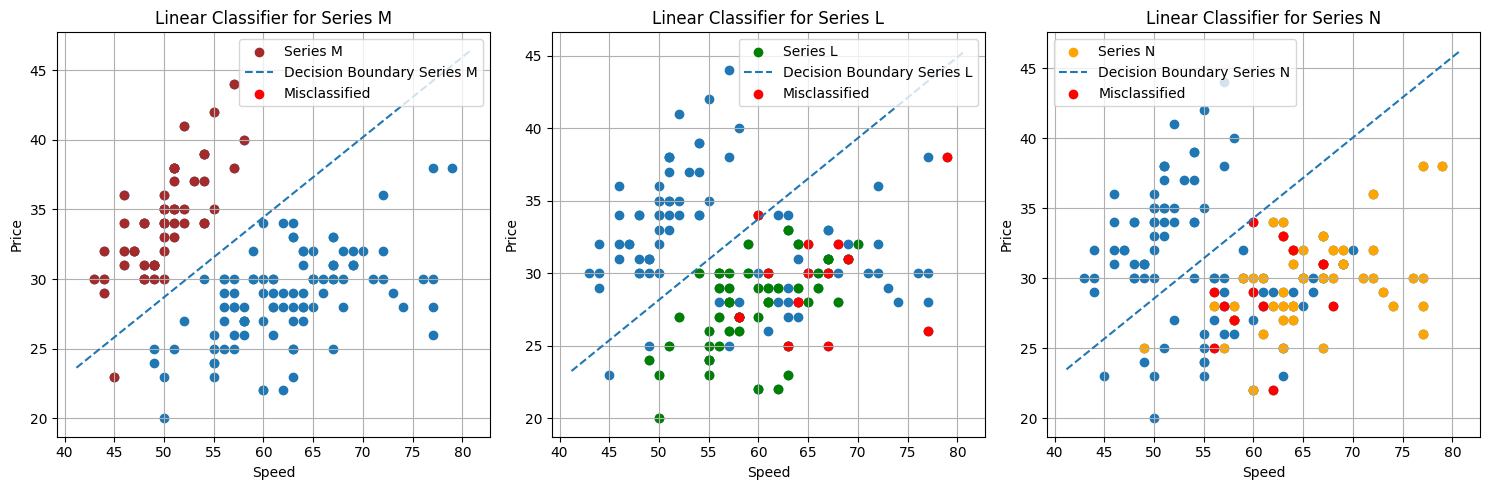

Mean Train Accuracy is:  0.7555555555555555
Mean Test Accuracy is:  0.7999999999999999


In [90]:
mean_train_acc = 0
mean_test_acc = 0
classifiers = {}
classes = ['Series M', 'Series L', 'Series N']
colors = ['brown', 'green', 'orange']  # Colors for each class

plt.figure(figsize=(15, 5))
for i,c in enumerate(classes,1):
    # Map class labels to 1 for the current class and 0 for others
    y_train_binary = np.where(data['Model'] == c, 1, 0)

    # Initialize and train the model
    X_train, X_test, y_train, y_test = train_test_split(X, y_train_binary, test_size=0.3, random_state=42)

    model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_train, y_train)
    classifiers[c] = model

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_pred_train)
    mean_train_acc += accuracy
    print(f"{c} Train Accuracy:", accuracy)

    accuracy = accuracy_score(y_test, y_pred_test)
    mean_test_acc += accuracy
    print(f"{c} Test Accuracy:", accuracy)

    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(X[data['Model'] == c][:, 0], X[data['Model'] == c][:, 1], label=c, color=colors[i-1])

    # Plot decision boundary
    coef = model.weights
    intercept = model.bias
    slope = -coef[0] / coef[1]
    intercept = -intercept / coef[1]
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--', label='Decision Boundary ' + c)

    # Mark misclassified points on test data points
    misclassified_points = X_test[y_test != y_pred_test]
    plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='red', label='Misclassified')

    plt.title(f'Linear Classifier for {c}')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

print("Mean Train Accuracy is: ",mean_train_acc/3)
print("Mean Test Accuracy is: ",mean_test_acc/3)